# Studio analysis

## import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import math 
import sys

## Add csv files

In [2]:
movie_budgets = pd.read_csv('databases/movie_budgets_clean.csv')

In [3]:
bom_movie_gross_clean = pd.read_csv('databases/bom_movie_gross_clean.csv')
bom_movie_gross_clean

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3351,The Quake,Magn.,6200.0,2018
3352,Edward II (2018 re-release),FM,4800.0,2018
3353,El Pacto,Sony,2500.0,2018
3354,The Swan,Synergetic,2400.0,2018


## Additional data manipulation

In [4]:
# Created a new df to remove outliers
bom_movie_gross_30m = bom_movie_gross_clean[bom_movie_gross_clean['domestic_gross'] > 30000000]

In [5]:
bom_movie_gross_30m

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3144,Uncle Drew,LG/S,42500000.0,2018
3145,Tyler Perry's Acrimony,LGF,43500000.0,2018
3150,Holmes and Watson,Sony,30600000.0,2018
3156,Death Wish (2018),MGM,34000000.0,2018


### Sorting and Grouping Data Frames

In [6]:
num_of_movies = bom_movie_gross_30m.groupby('studio').count()
num_of_values = num_of_movies.sort_values('title', ascending = False)

In [7]:
sum_of_revenue = bom_movie_gross_30m.groupby('studio').sum()

In [8]:
merged_db= num_of_values.merge(sum_of_revenue, on='studio',  how='inner')

In [9]:
merged_db = merged_db.reset_index()
merged_db= merged_db[:10]

In [10]:
num_of_values = num_of_values[0:10]

In [11]:
merged_db.groupby(by='studio').mean()

,title,domestic_gross_x,year_x,domestic_gross_y,year_y
studio,,,,,
BV,85,85,85,1.810330e+10,171184
Fox,107,107,107,1.054740e+10,215473
LG/S,23,23,23,1.791900e+09,46341
LGF,43,43,43,3.435600e+09,86593
Par.,71,71,71,7.280900e+09,142972
SGem,24,24,24,1.327800e+09,48303
Sony,81,81,81,8.283700e+09,163109
Uni.,112,112,112,1.235350e+10,225608
WB,101,101,101,1.165500e+10,203394


In [12]:
roi_studio= movie_budgets.merge(bom_movie_gross_30m, left_on='movie', right_on='title', how='inner')

In [13]:
roi_studio_median_roi = roi_studio.groupby(by='studio').median()
roi_studio_median_roi.head()

,id,production_budget,domestic_gross_x,worldwide_gross,domestic_gross_y,year
studio,,,,,,
A24,54.5,10000000.0,46513864.5,74372337.0,46550000.0,2017.5
Annapurna,100.0,60000000.0,47836282.0,70883171.0,47800000.0,2018.0
BV,39.0,162500000.0,176380519.5,388346358.0,176400000.0,2014.0
CBS,32.0,21500000.0,59123728.5,120935032.5,59100000.0,2012.5
FD,53.0,5000000.0,83586447.0,161921515.0,83600000.0,2013.0


In [14]:
# Create additional ROI column
roi_studio['roi'] = (roi_studio['worldwide_gross'] / roi_studio['production_budget']) -1

In [15]:
merged_db = merged_db.merge(roi_studio_median_roi, on= 'studio', how='left')

In [16]:
merged_db.head()

,studio,title,domestic_gross_x_x,year_x,domestic_gross_y_x,year_y,id,production_budget,domestic_gross_x_y,worldwide_gross,domestic_gross_y_y,year
0,Uni.,112,112,112,1.235350e+10,225608,56.0,44000000.0,75612460.0,151716815.0,78000000.0,2014.0
1,Fox,107,107,107,1.054740e+10,215473,49.0,80000000.0,81903458.0,250091610.0,81700000.0,2014.0
2,WB,101,101,101,1.165500e+10,203394,62.0,60000000.0,72483028.5,152764482.0,72500000.0,2014.0
3,BV,85,85,85,1.810330e+10,171184,39.0,162500000.0,176380519.5,388346358.0,176400000.0,2014.0
4,Sony,81,81,81,8.283700e+09,163109,58.0,58000000.0,83552429.0,202812429.0,83600000.0,2013.0


In [17]:
sum_of_revenue

,domestic_gross,year
studio,,
A24,9.310000e+07,4035
Annapurna,4.780000e+07,2018
Aviron,3.100000e+07,2017
BV,1.810330e+10,171184
CBS,1.557000e+08,6035
ENTMP,4.430000e+07,2017
FD,3.164000e+08,10060
Focus,6.155000e+08,26183
Fox,1.054740e+10,215473


In [18]:
num_of_values = num_of_values.reset_index()

In [19]:
num_of_values

,studio,title,domestic_gross,year
0,Uni.,112,112,112
1,Fox,107,107,107
2,WB,101,101,101
3,BV,85,85,85
4,Sony,81,81,81
5,Par.,71,71,71
6,LGF,43,43,43
7,WB (NL),40,40,40
8,SGem,24,24,24
9,LG/S,23,23,23


In [20]:
# domestic_gross_x & year_x = count of titles per studio
merged_db.head()

,studio,title,domestic_gross_x_x,year_x,domestic_gross_y_x,year_y,id,production_budget,domestic_gross_x_y,worldwide_gross,domestic_gross_y_y,year
0,Uni.,112,112,112,1.235350e+10,225608,56.0,44000000.0,75612460.0,151716815.0,78000000.0,2014.0
1,Fox,107,107,107,1.054740e+10,215473,49.0,80000000.0,81903458.0,250091610.0,81700000.0,2014.0
2,WB,101,101,101,1.165500e+10,203394,62.0,60000000.0,72483028.5,152764482.0,72500000.0,2014.0
3,BV,85,85,85,1.810330e+10,171184,39.0,162500000.0,176380519.5,388346358.0,176400000.0,2014.0
4,Sony,81,81,81,8.283700e+09,163109,58.0,58000000.0,83552429.0,202812429.0,83600000.0,2013.0


In [21]:
roi_studio_median_roi = roi_studio_median_roi.reset_index()

## Data Graphs

### Number of movies and total gross per studio 

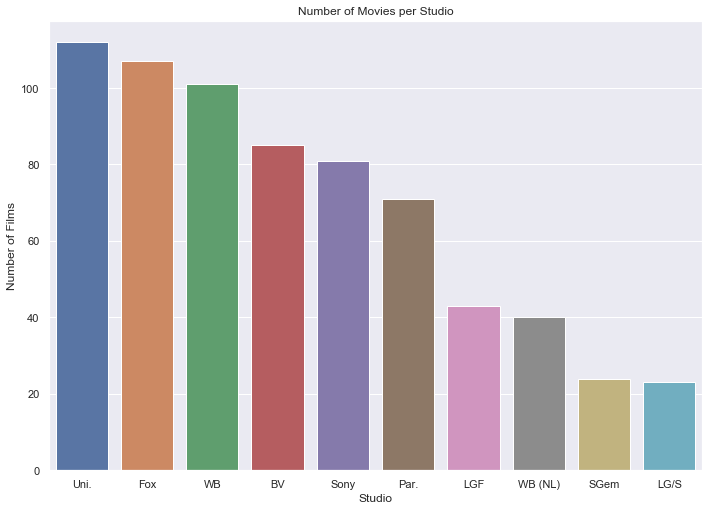

ValueError: Could not interpret input 'domestic_gross_y'

In [22]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})


axis= sns.barplot(x='studio', y='title', data=merged_db);
axis= axis.set(xlabel='Studio', ylabel='Number of Films');
plt.title('Number of Movies per Studio')
plt.show()

axis2=sns.barplot(x='studio', y='domestic_gross_y', data=merged_db);
axis2.set(xlabel='Studio', ylabel='Domestic Gross in Billions USD');
plt.title('Total Gross per Studio');

### Average gross per movie for each studio

In [ ]:
# Created new column for Average gross per movie
merged_db['Ave_per_movie']= merged_db['domestic_gross_y'] / merged_db['title']

In [ ]:

axis3= sns.barplot(x='studio', y='Ave_per_movie', data=merged_db);
axi3s= axis3.set(xlabel='Studio', ylabel='Average Revanue per Film in Billions USD')
plt.title('Average Revanue per Film for each Studio');

### Median ROI per Studio

In [ ]:
axis4= sns.barplot(x='studio', y='roi', data=merged_db);
axis4= axis4.set(xlabel='Studio', ylabel='Median ROI by Studio')
plt.title('Median ROI per Studio');

### Number of Movies made and Average Gross per Studio

In [ ]:
#impor new function
from pylab import figure, show, legend, ylabel

In [ ]:

# create the general figure
fig1 = figure()
 
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = sns.barplot(x='studio', y='title', data=merged_db, ax=ax1)
ylabel("Number of Movies Made")
line1.set_title('Number of Movies Made and Averge Domestice Gross for each Studio')
 
sns.set_style('ticks')


# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = sns.lineplot(x='studio', y='Ave_per_movie', data=merged_db, ax=ax2, color= 'black')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ylabel("Average domestic gross in 100 million ")
 
# for the legend, remember that we used two different axes so, we need 
# to build the legend manually
legend((line1, line2), ("1", "2"))
show()